<a href="https://colab.research.google.com/github/shaya-686/AI/blob/main/%D0%94%D0%97_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [398]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/House_Rent_Dataset.csv", index_col="Unnamed: 0")

[Інформація про дані](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset)

In [399]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000.0,1100.0,Ground out of 2,NaN,NaN,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2.0,20000.0,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,NaN
2,2022-05-16,2.0,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2.0,10000.0,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,NaN,2.0,7500.0,850.0,1 out of 2,Carpet Area,NaN,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [400]:
#df = df[['Rent', 'Size', 'Furnishing Status', 'City']]
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000.0,1100.0,Ground out of 2,NaN,NaN,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2.0,20000.0,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,NaN
2,2022-05-16,2.0,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2.0,10000.0,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,NaN,2.0,7500.0,850.0,1 out of 2,Carpet Area,NaN,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4379 non-null   object 
 1   BHK                4342 non-null   float64
 2   Rent               4369 non-null   float64
 3   Size               4402 non-null   float64
 4   Floor              4380 non-null   object 
 5   Area Type          4390 non-null   object 
 6   Area Locality      4347 non-null   object 
 7   City               4388 non-null   object 
 8   Furnishing Status  4395 non-null   object 
 9   Tenant Preferred   4372 non-null   object 
 10  Bathroom           4387 non-null   float64
 11  Point of Contact   4372 non-null   object 
dtypes: float64(4), object(8)
memory usage: 611.1+ KB


In [402]:
df.isna().sum()

Posted On            367
BHK                  404
Rent                 377
Size                 344
Floor                366
Area Type            356
Area Locality        399
City                 358
Furnishing Status    351
Tenant Preferred     374
Bathroom             359
Point of Contact     374
dtype: int64

In [403]:
df = df.dropna(subset=['Rent'])

# Завдання 1
Ввиведіть основні числові характеристики даних, розділіть на тренувальну та тестову чатини

In [404]:
df.select_dtypes(include='number').describe()

,BHK,Rent,Size,Bathroom
count,3994.000000,4.369000e+03,4050.000000,4037.000000
mean,2.080871,3.461306e+04,967.004444,1.969532
std,0.826387,7.740818e+04,630.252303,0.881375
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,7000.000000,7.000000


In [405]:
from sklearn.model_selection import train_test_split

y = df['Rent']
X = df.drop(columns=['Rent','Posted On'])

X_original_train, X_original_test, y_original_train, y_original_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Завдання 2
Створіть Pipeline для обробки числових стовпчиків(заповнення пропусків)

In [406]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

num_columns = X.select_dtypes(include="number").columns

num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy='median')),
           ('scaler', StandardScaler()),
           ("transformer", PowerTransformer())]
    )

# Завдання 3
Створіть Pipeline для обробки категоріальних стовпчиків(заповнення пропусків та кодування)

In [407]:
df.select_dtypes(include='object').describe()

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4030,4034,4035,3996,4045,4049,4020,4025
unique,81,439,3,2007,6,3,3,3
top,2022-07-06,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,Contact Owner
freq,262,333,2079,32,820,1931,2921,2735


In [408]:
cat_columns = X.select_dtypes(include="object").columns
cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder(sparse_output=False, min_frequency=0.01, drop='first', handle_unknown='ignore'))])

# Завдання 4
Об'єднайте попередні Pipeline в один ColumnTransformer

In [409]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler()),
                                                 ('transformer',
                                                  PowerTransformer())]),
                                 Index(['BHK', 'Size', 'Bathroom'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                min_frequency=0.01,
                                                                sparse_output=False))]),
                                 Index(['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Point of Contact'],
      dtype='object'))])

# Завдання 5
Створіть остаточну модель та натренуйте її

In [410]:
from sklearn.linear_model import LinearRegression

model = Pipeline(
    [("prep", preprocessor),
     ("model", LinearRegression())
     ]
)

model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('transformer',
                                                                   PowerTransformer())]),
                                                  Index(['BHK', 'Size', 'Bathroom'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 min_frequency=0.01,
                                                                                 sparse_output=False))]),
                                                  Index(['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Point of Contact'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [411]:
model.fit(X_original_train, y_original_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('transformer',
                                                                   PowerTransformer())]),
                                                  Index(['BHK', 'Size', 'Bathroom'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 min_frequency=0.01,
                                                                                 sparse_output=False))]),
                                                  Index(['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Point of Contact'],
      dtype='object'))])),
                ('model', LinearRegression())])

# Завдання 6
Виведіть основні метрики моделі

In [412]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

y_pred = model.predict(X_original_test)

all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_original_train, model.predict(X_original_train))
all_metrics["test"] = get_metrics(y_original_test, y_pred)


all_metrics

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,train,test
MAE,25237.39,25744.45
RMSE,72311.36,43145.92
R2,0.23,0.35


<Axes: >

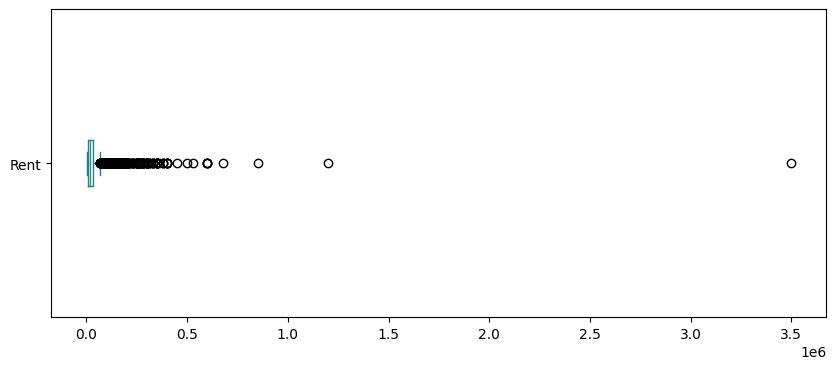

In [413]:
df['Rent'].plot(kind='box', vert=False, figsize=(10,4))

In [414]:
q1 = df['Rent'].quantile(q=0.25)
q3 = df['Rent'].quantile(q=0.75)

IQR = q3 - q1
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR

mask = (df['Rent'] >= lower) & (df['Rent'] <= upper)
df = df[mask]

<Axes: >

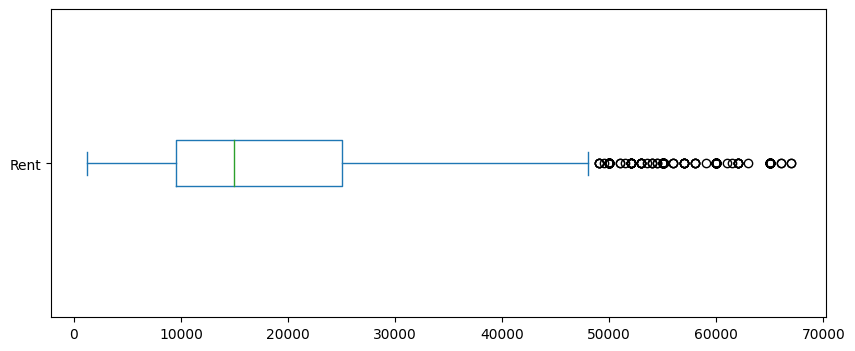

In [415]:
df['Rent'].plot(kind='box', vert=False, figsize=(10,4))

In [416]:
y = df['Rent']
X = df.drop(columns=['Rent','Posted On'])

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X, y, train_size=0.8, random_state=42)

model.fit(X_new_train, y_new_train)



Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('transformer',
                                                                   PowerTransformer())]),
                                                  Index(['BHK', 'Size', 'Bathroom'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 min_frequency=0.01,
                                                                                 sparse_output=False))]),
                                                  Index(['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Point of Contact'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [417]:
y_pred = model.predict(X_original_test)

all_metrics = pd.DataFrame()

all_metrics["train_new"] = get_metrics(y_new_train, model.predict(X_new_train))
all_metrics["test_old"] = get_metrics(y_original_test, y_pred)
all_metrics["test_new"] = get_metrics(y_new_test, model.predict(X_new_test))
all_metrics

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,train_new,test_old,test_new
MAE,5964.21,17047.45,5905.57
RMSE,8208.73,47814.75,8460.71
R2,0.64,0.20,0.66


# Завдання 7
Збережіть модель, завантажте її та спрогнозуйте ціну автомобіля

In [419]:
data = pd.DataFrame({'Size': [900],
                     'Furnishing Status': ['Semi-Furnished'],
                     'City': ['Mumbai'],
                     'BHK': [2],
                     'Floor': [np.nan],
                     'Area Type': ['Super Area'],
                     'Area Locality': [np.nan],
                     'Furnishing Status': ['Semi-Furnished'],
                     'Tenant Preferred': ['Bachelors/Family'],
                     'Bathroom': [2],
                     'Point of Contact': [np.nan]
                     })

model.predict(data)

array([31230.90794216])

In [420]:
import joblib
joblib.dump(model, 'my_model.pkl')

['my_model.pkl']

In [421]:
load_model = joblib.load('my_model.pkl')
load_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('transformer',
                                                                   PowerTransformer())]),
                                                  Index(['BHK', 'Size', 'Bathroom'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 min_frequency=0.01,
                                                                                 sparse_output=False))]),
                                                  Index(['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Point of Contact'],
      dtype='object'))])),
                ('model', LinearRegression())])